In [17]:
import pandas as pd
import numpy as np
from pprint import pprint
import sys
import requests
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
low_memory=False
from scipy.stats import linregress
import matplotlib.ticker as mtick
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [18]:
csv_file = 'Resources/GenreMovies.csv'
genre_movie_df = pd.read_csv(csv_file)

In [19]:
# Get indexes for which column budget has value 0
zero_values = genre_movie_df[genre_movie_df['budget'] == 0 ].index 
# Delete these row indexes from dataFrame
genre_movie_df.drop(zero_values , inplace=True)
len(zero_values)

1551

In [20]:
genre_movie_grouping_df = genre_movie_df.loc[:,['genre','budget','revenue']].groupby('genre').mean().astype(int)

In [21]:
genre_movie_grouping_df

,budget,revenue
genre,,
Action,60236494,189509131
Adventure,100604023,315423461
Animation,65148923,263967040
Comedy,22593698,68792963
Crime,25652095,62687966
Documentary,3967064,8832964
Drama,18900967,55950204
Family,57916505,224206121
Fantasy,60983520,193280503


In [22]:
# Add profit and profit margin columns
genre_movie_grouping_df['profit'] = genre_movie_grouping_df['revenue'] - genre_movie_grouping_df['budget']
genre_movie_grouping_df['profit margin'] = round((genre_movie_grouping_df['profit'] / genre_movie_grouping_df['revenue'])
                                           *100,1)
genre_movie_grouping_df = genre_movie_grouping_df.drop(['TV Movie'])
genre_movie_grouping_df = genre_movie_grouping_df.sort_values('profit margin')
genre_movie_grouping_df

,budget,revenue,profit,profit margin
genre,,,,
Documentary,3967064,8832964,4865900,55.1
Music,18187892,40718011,22530119,55.3
Thriller,23446719,56290631,32843912,58.3
Crime,25652095,62687966,37035871,59.1
War,45912287,121641813,75729526,62.3
Romance,20920201,57347402,36427201,63.5
Drama,18900967,55950204,37049237,66.2
Western,44250000,134960177,90710177,67.2
Comedy,22593698,68792963,46199265,67.2


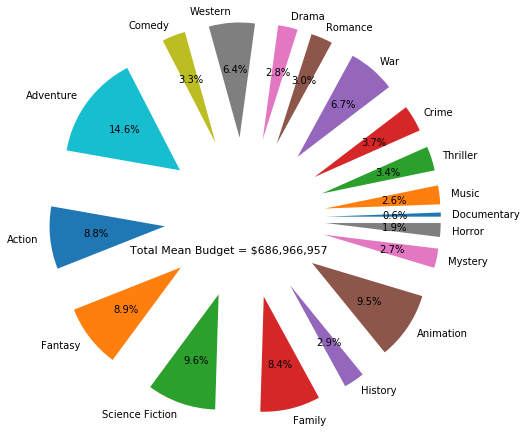

In [23]:
revenue_sum = genre_movie_grouping_df['budget'].sum()
genre_list = genre_movie_grouping_df['budget'].keys()
explode = [x * 0 + 0.7 for x in range(len(genre_list))]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(genre_movie_grouping_df['budget'], labels = genre_list,autopct='%1.1f%%',explode=explode)
ax.annotate(f'Total Mean Budget = ${revenue_sum:,}',(-1,-0.3), fontsize=11)
fig.savefig('Images/Pie_Mean_Budget.png',bbox_inches = "tight")
plt.show()

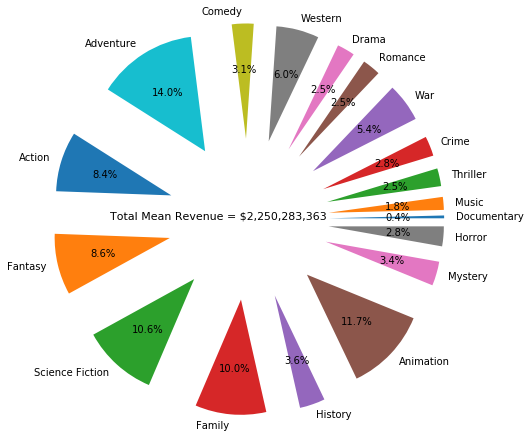

In [24]:
revenue_sum = genre_movie_grouping_df['revenue'].sum()
genre_list = genre_movie_grouping_df['revenue'].keys()
explode = [x * 0 + 0.7 for x in range(len(genre_list))]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(genre_movie_grouping_df['revenue'], labels = genre_list,autopct='%1.1f%%',explode=explode)
ax.annotate(f'Total Mean Revenue = ${revenue_sum:,}',(-1.2,0), fontsize=11)
fig.savefig('Images/Pie_Mean_Revenue.png', bbox_inches = "tight")
plt.show()

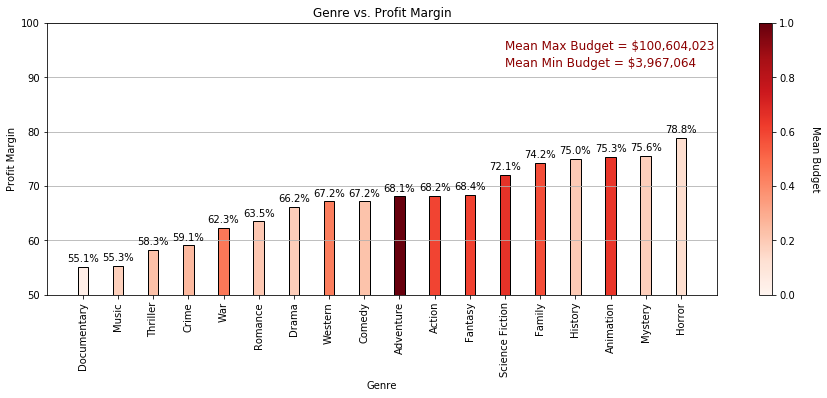

In [25]:
max_budget = max(genre_movie_grouping_df['budget'])
min_budget = min(genre_movie_grouping_df['budget'])
data_color = [ x / max_budget for x in genre_movie_grouping_df['budget']]
fig, ax = plt.subplots(figsize=(15, 5))
my_cmap = plt.cm.get_cmap('Reds')
colors = my_cmap(data_color)
bar_graph = ax.bar(genre_movie_grouping_df.index, genre_movie_grouping_df['profit margin'], width = .3, 
                   edgecolor= 'black', color = colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Mean Budget', rotation=270,labelpad=25)
ax.annotate(f"Mean Max Budget = ${max_budget:,}",('Science Fiction',95),fontsize=12,color="darkred")
ax.annotate(f"Mean Min Budget = ${min_budget:,}",('Science Fiction',92),fontsize=12,color="darkred")
ax.set_ylim(50, 100)
plt.xticks(genre_movie_grouping_df.index, rotation='vertical')
ax.set_title("Genre vs. Profit Margin")
ax.set_ylabel("Profit Margin")
ax.set_xlabel("Genre")
ax.grid(axis='y')
# Cite: funtion autolabel
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar_graph)
fig.savefig('Images/Bar_GenrevProfit_Margin.png', bbox_inches = "tight")
fig.show()           

In [26]:
genre_movie_df['profit'] = genre_movie_df['revenue'] - genre_movie_df['budget']
genre_movie_df['profit margin'] = round((genre_movie_df['profit'] / genre_movie_df['revenue'])*100,1)
adventure_df = genre_movie_df[genre_movie_df.genre == 'Adventure']
# Get indexes for which column budget has value 0
#zero_values = adventure_df[ adventure_df['budget'] == 0 ].index 
# Delete these row indexes from dataFrame
#adventure_df.drop(zero_values , inplace=True)
adventure_df.head(50)

,Unnamed: 0,id,imdb_id,budget,runtime,original_title,title,revenue,release_date,genres,genre,profit,profit margin
16,272,20526,tt1104001,170000000,125.0,TRON: Legacy,TRON: Legacy,400062763,2010-12-10,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Adventure,230062763,57.5
73,1019,68737,tt1121096,95000000,102.0,Seventh Son,Seventh Son,114178613,2014-12-12,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure,19178613,16.8
94,1338,118,tt0367594,150000000,115.0,Charlie and the Chocolate Factory,Charlie and the Chocolate Factory,474968763,2005-07-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",Adventure,324968763,68.4
98,1356,8915,tt1129445,40000000,111.0,Amelia,Amelia,19258519,2009-10-22,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",Adventure,-20741481,-107.7
102,1379,4442,tt0355295,88000000,118.0,The Brothers Grimm,The Brothers Grimm,105316267,2005-08-26,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure,17316267,16.4
118,1544,44912,tt1133985,200000000,114.0,Green Lantern,Green Lantern,219851172,2011-06-16,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Adventure,19851172,9.0
212,3025,57158,tt1170358,250000000,161.0,The Hobbit: The Desolation of Smaug,The Hobbit: The Desolation of Smaug,958400000,2013-12-11,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure,708400000,73.9
235,3340,232572,tt1178665,8000000,104.0,A Walk in the Woods,A Walk in the Woods,35991087,2015-09-02,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",Adventure,27991087,77.8
252,3440,369126,tt1183658,3500000,95.0,18-14,18-14,2490500,2007-12-27,"[{'id': 12, 'name': 'Adventure'}, {'id': 36, '...",Adventure,-1009500,-40.5
259,3491,10488,tt0410377,37000000,96.0,Nim's Island,Nim's Island,100076342,2008-04-03,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",Adventure,63076342,63.0


In [27]:
adventure_df['budget'].max()

380000000

The r-squared is: 0.6541438987339593


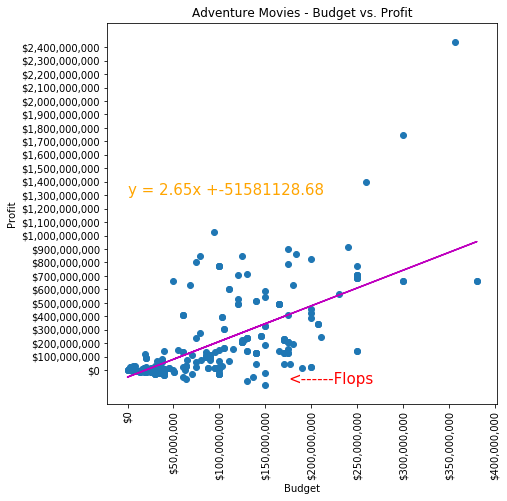

In [28]:
# Create a Scatter Plot for Adventure Movies - budget vs. profit margin 
x_values = adventure_df['budget']
y_values = adventure_df['profit']
# Perform a linear regression on budget vs. pforit margin
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
fig, ax = plt.subplots(figsize=(7,7))
ax.annotate(line_eq,(0,1300000000),fontsize=15,color="orange")
ax.plot(x_values,regress_values,"m-")
ax.scatter(x_values,y_values)
ax.set_xlabel(f'Budget')
ax.set_ylabel(f'Profit')
ax.set_yticks(np.arange(0,2500000000,100000000))
ax.set_xticklabels(x_values, rotation='vertical')
ax.set_yticklabels(y_values)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)
ax.set_title(f'Adventure Movies - Budget vs. Profit',fontsize=12)
ax.annotate(f'<------Flops',(175000000,-100000000),fontsize=15,color="red")
# Print r square value
print(f"The r-squared is: {rvalue}")
fig.savefig('Images/Scatter_BudgetvProfit.png', bbox_inches = "tight")
# Show plot
plt.show()

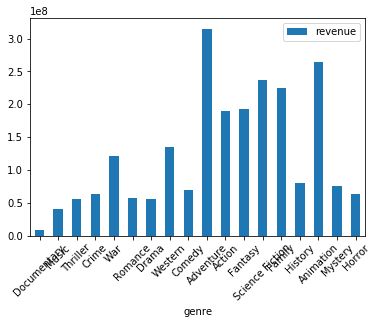

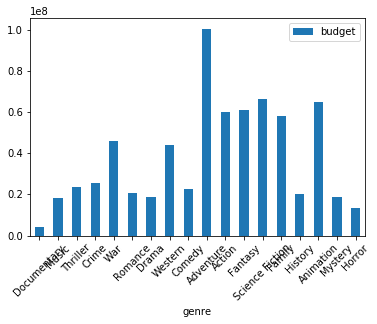

In [87]:
p1 = genre_movie_grouping_df.reset_index().plot.bar(x='genre', y='revenue', rot=45)
p2 = genre_movie_grouping_df.reset_index().plot.bar(x='genre', y='budget', rot=45)
plt.show()

In [30]:
genre_movie_df.columns

Index(['Unnamed: 0', 'id', 'imdb_id', 'budget', 'runtime', 'original_title',
       'title', 'revenue', 'release_date', 'genres', 'genre', 'profit',
       'profit margin'],
      dtype='object')

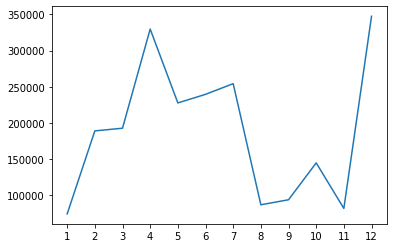

In [85]:
action_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Action']
action_genre_releaseDate_df = action_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
action_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(action_genre_releaseDate_df['release_date']).month
action_genre_releaseDate_monthGroup_df = action_genre_releaseDate_df.groupby('release_month').mean()
revenue_action_genre_releaseDate_monthGroup_df = action_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_action_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.xticks(revenue_action_genre_releaseDate_monthGroup_df.index)
plt.plot(revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.show()

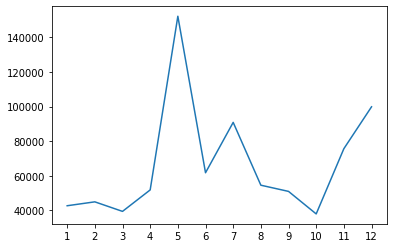

In [82]:
comedy_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Comedy']
comedy_genre_releaseDate_df = comedy_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
comedy_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(comedy_genre_releaseDate_df['release_date']).month
comedy_genre_releaseDate_monthGroup_df = comedy_genre_releaseDate_df.groupby('release_month').mean()
revenue_comedy_genre_releaseDate_monthGroup_df = comedy_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_comedy_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.xticks(revenue_comedy_genre_releaseDate_monthGroup_df.index)
plt.plot(revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'])

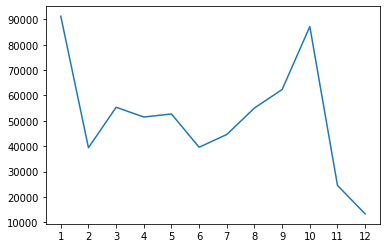

In [81]:
horror_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Horror']
horror_genre_releaseDate_df = horror_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
horror_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(horror_genre_releaseDate_df['release_date']).month
horror_genre_releaseDate_monthGroup_df = horror_genre_releaseDate_df.groupby('release_month').mean()
revenue_horror_genre_releaseDate_monthGroup_df = horror_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_horror_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_horror_genre_releaseDate_monthGroup_df.index)
plt.show()

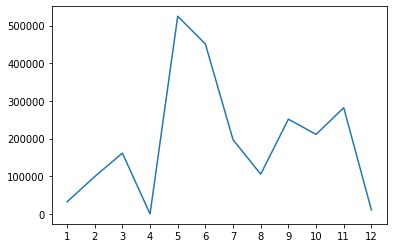

In [90]:
SciFi_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Science Fiction']
SciFi_genre_releaseDate_df = SciFi_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
SciFi_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(SciFi_genre_releaseDate_df['release_date']).month
SciFi_genre_releaseDate_monthGroup_df = SciFi_genre_releaseDate_df.groupby('release_month').mean()
revenue_SciFi_genre_releaseDate_monthGroup_df = SciFi_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_SciFi_genre_releaseDate_monthGroup_df.index)
plt.show()

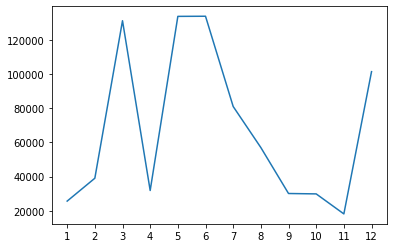

In [100]:
romance_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Romance']
romance_genre_releaseDate_df = romance_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
romance_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(romance_genre_releaseDate_df['release_date']).month
romance_genre_releaseDate_monthGroup_df = romance_genre_releaseDate_df.groupby('release_month').mean()
revenue_romance_genre_releaseDate_monthGroup_df = romance_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_romance_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_romance_genre_releaseDate_monthGroup_df.index)
plt.show()

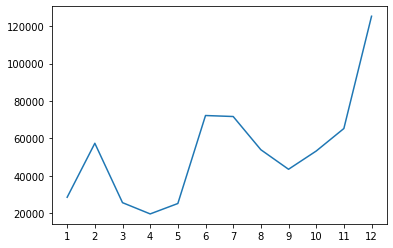

In [104]:
drama_genre_df = genre_movie_df.loc[genre_movie_df['genre'] == 'Drama']
drama_genre_releaseDate_df = drama_genre_df.loc[:,['title','release_date','revenue','profit','profit margin']]
drama_genre_releaseDate_df['release_month'] = pd.DatetimeIndex(drama_genre_releaseDate_df['release_date']).month
drama_genre_releaseDate_monthGroup_df = drama_genre_releaseDate_df.groupby('release_month').mean()
revenue_drama_genre_releaseDate_monthGroup_df = drama_genre_releaseDate_monthGroup_df.loc[:,['revenue']]
revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'] = round(revenue_drama_genre_releaseDate_monthGroup_df['revenue'] / 1000,2)
plt.plot(revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_drama_genre_releaseDate_monthGroup_df.index)
plt.show()

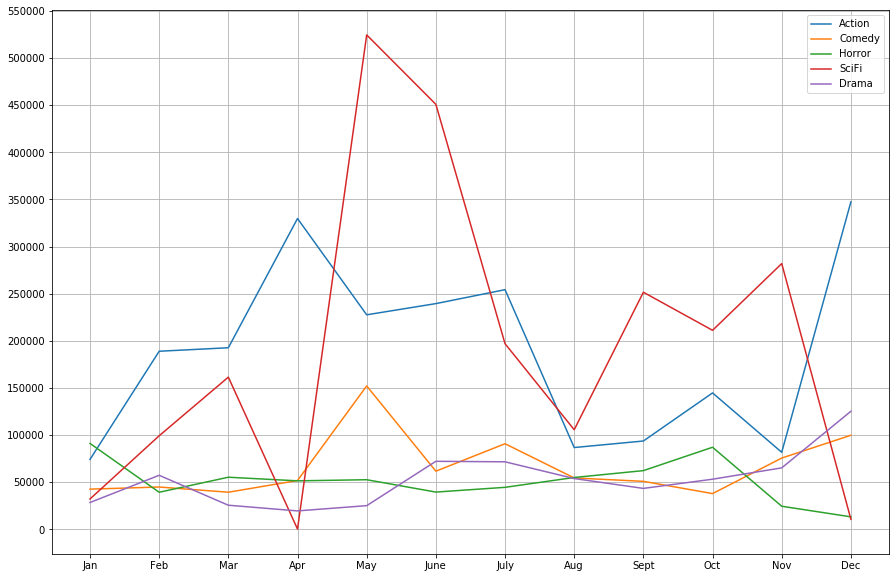

In [127]:
plt.figure(figsize=(15,10))
plt.plot(revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'])
# plt.plot(revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.plot(revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'])
plt.xticks(revenue_drama_genre_releaseDate_monthGroup_df.index,['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
y_axis_ticks = np.arange(0,600000,50000)
plt.yticks(y_axis_ticks)
plt.legend(['Action', 'Comedy', 'Horror','SciFi','Drama'], loc='upper right')
plt.grid()
plt.show()

In [137]:
horror_genre = revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands']
genre_month_comparison_df = pd.DataFrame(horror_genre)
# genre_month_comparison_df.index.names = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
genre_month_comparison_df.columns = ['Horror']
# genre_month_comparison_df['Action'] = plt.plot(revenue_action_genre_releaseDate_monthGroup_df['revenue_thousands'])
# plt.plot(revenue_comedy_genre_releaseDate_monthGroup_df['revenue_thousands'])
# plt.plot(revenue_horror_genre_releaseDate_monthGroup_df['revenue_thousands'])
# plt.plot(revenue_SciFi_genre_releaseDate_monthGroup_df['revenue_thousands'])
# # plt.plot(revenue_romance_genre_releaseDate_monthGroup_df['revenue_thousands'])
# plt.plot(revenue_drama_genre_releaseDate_monthGroup_df['revenue_thousands'])
genre_month_comparison_df

,Horror
release_month,
1,91213.60
2,39390.81
3,55338.17
4,51500.36
5,52691.79
6,39583.78
7,44619.46
8,55061.93
9,62342.00
